#**Machine Learning for Digital Fraud Detection**
###Comparing the Performance of Stacking Classifier & Deep Learning Models in Identifying Instances of Digital Transaction Fraud



Brian Morrison

DATA606 - Capstone Project in Data Science

Professor Jay Wang

The University of Maryland, Baltimore County

##**Part Two - Ensemble Classification Model**

####**Introduction & Notebook Overview**

The purpose of this notebook is to create, train, and evaluate an Emsemble Classification Model on our data. An Ensemble Classification Model is a machine learning model comprised of multiple smaller classifiers, in which the output of the preceding classifier is passsed as an input to the succeeding classifier, ending with a final classifier that outputs a class prediction. This notebook will use LazyPredict, a Python library for evaluating simple classifier performance, to guide selection of 3 classifiers to build a Stacking Model - a type of Ensemble Classification Model.  

####**Importing Data**

#####SMOTE Data

In [ ]:
#we will start by reading in our data, stored in this project's GitHub repository - starting with the training data

import numpy as np
import pandas as pd

SMOTE_train_df_dict = {} #instantiating blank dictionary to store dataframes
SMOTE_train_df_list = ['SMOTE_train_data1', 'SMOTE_train_data2', 'SMOTE_train_data3']

for df in SMOTE_train_df_list:
  df_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/SMOTE/' + df + '.csv' #access url
  df_name = 'SMOTE_train_df' + df[16]
  SMOTE_train_df_dict[df_name] = pd.read_csv(df_url, index_col = 0)

In [ ]:
#reading in testing data

test_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/test_data.csv'
test_df = pd.read_csv(test_url)
test_df = test_df.drop('Unnamed: 0', axis = 1) #removing first index column, which was carried over

In [ ]:
#we can now concatenate the partitioned data

SMOTE_train_df = pd.concat(SMOTE_train_df_dict.values(), ignore_index = True)
SMOTE_train_df.head()

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,...,C12,C13,C14,C,H,R,S,W,TransactionDT_mmscaler,isFraud
0,0.003656,0.000427,0.000351,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.014286,...,0.000000,0.004112,0.0014,0,0,0,0,1,0.532154,0
1,0.002355,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000443,0.0003,0.000000,...,0.000314,0.000343,0.0007,1,0,0,0,0,0.038185,0
2,0.003029,0.000213,0.000176,0.0,0.000000,0.0,0.000444,0.000000,0.0000,0.004762,...,0.000000,0.000000,0.0000,0,0,0,0,1,0.048856,0
3,0.003342,0.000427,0.000176,0.0,0.000000,0.0,0.000888,0.000000,0.0000,0.009524,...,0.000000,0.001028,0.0014,0,0,0,0,1,0.536695,0
4,0.001558,0.000213,0.000176,0.0,0.000444,0.0,0.000444,0.000000,0.0003,0.000000,...,0.000000,0.000343,0.0007,0,1,0,0,0,0.251057,0


In [ ]:
len(SMOTE_train_df)

797828

#####ROS Data

In [ ]:
ROS_train_df_dict = {} 
ROS_train_df_list = ['ROS_train_data1', 'ROS_train_data2', 'ROS_train_data3']

for df in ROS_train_df_list:
  df_url = 'https://raw.githubusercontent.com/briancmorrison/brian_data606/main/Data/Cleaned/ROS/' + df + '.csv' 
  df_name = 'ROS_train_df' + df[14]
  ROS_train_df_dict[df_name] = pd.read_csv(df_url, index_col = 0)

In [ ]:
ROS_train_df = pd.concat(ROS_train_df_dict.values(), ignore_index = True)
ROS_train_df.head()

In [ ]:
len(ROS_train_df)

####**Defining Variables & Splitting Data**

In [ ]:
y_train_SMOTE = SMOTE_train_df.pop('isFraud')
X_train_SMOTE = SMOTE_train_df.to_numpy()

y_train_ROS = ROS_train_df.pop('isFraud')
X_train_ROS = ROS_train_df.to_numpy()

y_test = test_df.pop('isFraud')
X_test = test_df.to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split

#splitting one of the smaller dataframes to use to evaluate classifiers
X_train_small = ROS_train_df_dict['ROS_train_df1'][:30000] #subset of rows due to RAM limitations
y_train_small = X_train_small['isFraud']

X_eval_train, X_eval_test, y_eval_train, y_eval_test = train_test_split(X_train_small, y_train_small, test_size = .3, random_state = 4)

In [ ]:
y_train_small.value_counts()

0    28953
1     1047
Name: isFraud, dtype: int64

In [ ]:
del SMOTE_train_df_dict
del ROS_train_df_dict

####**Using LazyPredict to Select Classifiers**

In [ ]:
!pip uninstall scikit-learn -y 
!pip install scikit-learn==0.24 #updating scikit-learn version, per lazypredict requirements

!pip install lazypredict #grabbing lazypredict from command line

#Reference link: https://github.com/shankarpandala/lazypredict/blob/3d62db32c0058039fcde9a2322d7e88d13473bb3/requirements.txt#L8

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.1 MB 4.2 MB/s 
     |████████████████████████████████| 6.8 MB 2.3 MB/s 
     |████████████████████████████████| 269 kB 55.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 72 kB 902 kB/s 
     |████████████████████████████████| 14.5 MB 4.8 MB/s 
     |████████████████████████████████| 248 kB 60.1 MB/s 
     |████████████████████████████████| 302 kB 45.3 MB/s 
     |████████████████████████████████| 127.6 MB 22 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=6ccb0ac851e25c2c83ae2b94bf5174a6da9e8d3825658131b328da9c05d89228
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

LazyC = LazyClassifier(verbose = 0, ignore_warnings = True, custom_metric = None) #instantiating Lazy Classifier object

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
classifiers, preds = LazyC.fit(X_eval_train, X_eval_test, y_eval_train, y_eval_test)
print(classifiers)

100%|██████████| 29/29 [01:34<00:00,  3.26s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 1.00               1.00     1.00      1.00   
LinearDiscriminantAnalysis         1.00               1.00     1.00      1.00   
XGBClassifier                      1.00               1.00     1.00      1.00   
SGDClassifier                      1.00               1.00     1.00      1.00   
RidgeClassifierCV                  1.00               1.00     1.00      1.00   
RidgeClassifier                    1.00               1.00     1.00      1.00   
RandomForestClassifier             1.00               1.00     1.00      1.00   
QuadraticDiscriminantAnalysis      1.00               1.00     1.00      1.00   
Perceptron                         1.00               1.00     1.00      1.00   
PassiveAggressiveClassifier        1.00               1.00     1.00      1.00   
LogisticRegression          

####**Building Stacking (Ensemble) Classifier**

Now that we have evaluated several simple classifiers for their effectiveness, we can progress on to constructing a Stacking Classifier compromised of the top performers. For this project, we will select the 3 first listed models from the highest scoring group - AdaBoost Classifier, Linear Discriminant Analysis or LDA, and XGB Classifer - to comprise our final model. Additionally, a Logisitic Regression model will be used as the final, authoritative estimator to output a final class label prediction. 

A brief description of the models comprising the Stacking Classifier:

* *AdaBoost Classifier* - Adaptive Boosting, or AdaBoost, is a model that itself is an Ensemble Classifier, fitting multiple "weak learners" in succession and reconciling the incorrect predictions made by preceding models to improve those later in the chain. Generally, AdaBoost models are comprised of multiple shallow tree-based models which individually hold limited validity as classifiers.
* *Linear Discriminant Analysis* - Linear Discriminant Analysis, or LDA, is linear approach to classification that is also widely leveraged as an approach to dimensionality reduction, similar to PCA. It is effective at projecting features into lower dimensional spaces and identifying linear separations between classes where they exist.
* *XGBoost Classifier* - Extreme Gradient Boosting, or XGBoost, is a popular implementation of gradient-boosted decision trees that, similar to AdaBoost, is comprised of multiple weak learning classifiers. The model uses a gradient descent algorithm to minimize the loss function among later models, identifying areas of descent along the loss convex that might indicate an absolute minimum. 

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

abc = AdaBoostClassifier()
lda = LinearDiscriminantAnalysis()
xgb = xgb.XGBClassifier()

classifiers = [('adaboost', abc), ('lda', lda), ('xgboost', xgb)]

stack = StackingClassifier(classifiers, final_estimator = LogisticRegression())

####**Model Fitting & Evaluation**

#####SMOTE

In [ ]:
SMOTE_stack_fit = stack.fit(X_train_SMOTE, y_train_SMOTE) #fitting the model to our training data

SMOTE_stack_fit.score(X_train_SMOTE, y_train_SMOTE)

0.9035042640769689

At first glance, it looks like our model performed exceptionally well with our training data! However, accuracy scores can be misleading in cases of binary classification, as even a model outputting a single class label could be correct in a substantial number of cases in sufficiently imbalanced datasets. Using classifiation reports, we may be able to understand these results better.

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

predictions = SMOTE_stack_fit.predict(X_test) #generating predictions
print(classification_report(predictions, y_test)) # generating classification report to assess utility of classifier

              precision    recall  f1-score   support

           0       0.93      0.98      0.96    162622
           1       0.54      0.23      0.32     14540

    accuracy                           0.92    177162
   macro avg       0.74      0.61      0.64    177162
weighted avg       0.90      0.92      0.91    177162



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def show_classification_matrix(y_true, y_pred): #using a helper function retrieved from DATA602 lecture notes to build the classification matrix
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot = True, fmt = "0")
  ax = plt.gca()
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")

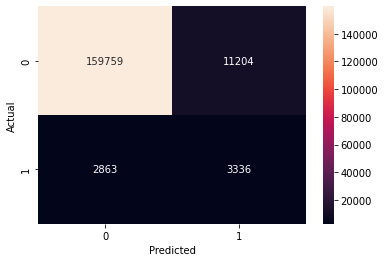

In [ ]:
show_classification_matrix(y_test, predictions) #employing our classification matrix function

#####ROS

In [ ]:
ROS_stack_fit = stack.fit(X_train_ROS, y_train_ROS) #fitting the model to our training data

ROS_stack_fit.score(X_train_ROS, y_train_ROS)

0.7843921246183387

In [ ]:
predictions = ROS_stack_fit.predict(X_test) #generating predictions
print(classification_report(predictions, y_test)) # generating classification report to assess utility of classifier

              precision    recall  f1-score   support

           0       0.83      0.99      0.90    144297
           1       0.73      0.14      0.23     32865

    accuracy                           0.83    177162
   macro avg       0.78      0.56      0.57    177162
weighted avg       0.81      0.83      0.78    177162



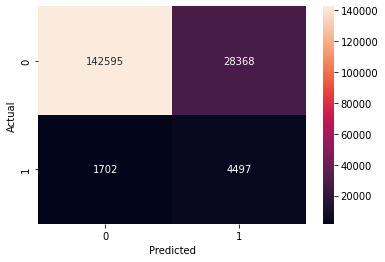

In [ ]:
show_classification_matrix(y_test, predictions) #employing our classification matrix function